### Scientific Computing with Python: Getting familiar with ```numpy```, ```scipy``` and ```scikit-learn``` for data analysis.

#### Exercise 1: Load and view a Toy Dataset using Python libraries.

From the documentation, figure out how to load the <b>Iris dataset</b> from <a href="https://scikit-learn.org/1.5/datasets/toy_dataset.html">scikit-learn</a>. Finally, use ```pandas``` to store the data in machine-learning friendly format using ```pd.DataFrame``` and view it using ```df.head()```.

In [117]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# load the data
iris = load_iris()

X = iris.data
y = iris.target
# one-hot encode
y = pd.get_dummies(y)

df = pd.DataFrame(
    data = np.hstack((X, y)),
    columns=np.hstack((iris['feature_names'], iris['target_names'])),
)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


#### Exercise 2: Summarize your data statistics and perform a significance test.

Use either ```numpy```, ```scipy``` or ```pandas``` to statistically summarize the classes in your data by computing the mean and standard deviation. Do it for all features, if there is more than one. Summarize the results in a ```pd.DataFrame```.

In [106]:
means = []
stds = []
for i in range(y.shape[1]):
    means += [df[y.values[:,i]].mean()]
    stds += [df[y.values[:,i]].std()]

summary = pd.DataFrame(means + stds)

display(summary)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
0,5.006000,3.428000,1.462000,0.246000,1.0,0.0,0.0
1,5.936000,2.770000,4.260000,1.326000,0.0,1.0,0.0
2,6.588000,2.974000,5.552000,2.026000,0.0,0.0,1.0
3,0.352490,0.379064,0.173664,0.105386,0.0,0.0,0.0
4,0.516171,0.313798,0.469911,0.197753,0.0,0.0,0.0
5,0.635880,0.322497,0.551895,0.274650,0.0,0.0,0.0


#### Exercise 3: Perform a significance test using your dataset.

Choose an interesting feature from your dataset and use ```scipy``` to perform a signicance test to determine if there is a significant difference between your classes/targets. For bonus points, select a good plot from ```seaborn``` and visualize the data.

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)


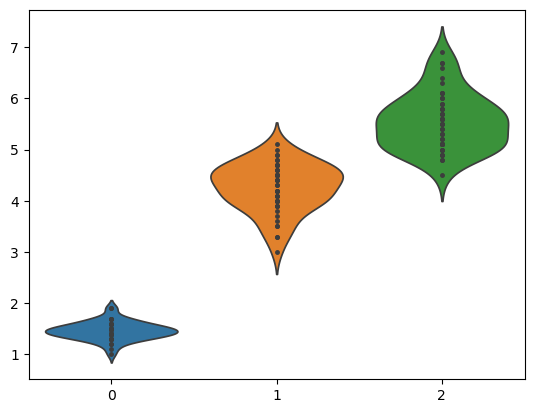

In [107]:
import seaborn as sns
from scipy.stats import f_oneway

# from our stats, it seems petal length might be significant
feature = "petal length (cm)"
v0 = df[feature].values[y.values[:,0]]
v1 = df[feature].values[y.values[:,1]]
v2 = df[feature].values[y.values[:,2]]

sns.violinplot(data=[v0, v1, v2], inner='point')

result = f_oneway(v0, v1, v2)

print(result)

#### Exercise 4: Load and prepare a Toy Dataset for Binary Classification

Use your code from Ex. 1 to load the <b>Breast cancer wisconsin (diagnostic) dataset</b> from ```scikit-learn```. This dataset is more intereting than Iris from a Machine Learning perspective, as it has a binary class output (malignant/benign) and a decent number of patients and features for us to work with. 

In [123]:
from sklearn.datasets import load_breast_cancer

# load the data
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target
# one-hot encode
y = pd.get_dummies(y)

df = pd.DataFrame(
    data = np.hstack((X, y)),
    columns=np.hstack((breast_cancer['feature_names'], breast_cancer['target_names'])),
)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0,0.0


#### Exercise 5: Visualize the data using Dimensionality Reduction

Data visualization is critical to determining how to move forward in any machine learning task. However, high-dimensional data like we have here is difficult, if not impossible, to visualize. 

Below we have taken our high-dimensional data and reduced it to 2-dimensions using <a href="https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html">Principle Component Analysis (PCA)</a>. If we plot the result and label based on our known targets, we can see if two groups exist within the data or not. Run the code: does it look like a nice binary classification problem, or not?

PCA is kind of outdated, and isn't the best method for visualizing clusters. A more modern technique is <a href="https://scikit-learn.org/0.16/modules/generated/sklearn.manifold.TSNE.html">t-distributed Stochastic Neighbor Embedding (tSNE)</a>.

Implement tSNE to reduce the data to 2-dimensions. How does our outlook for binary classification look now?

Text(0.5, 1.0, 'tSNE')

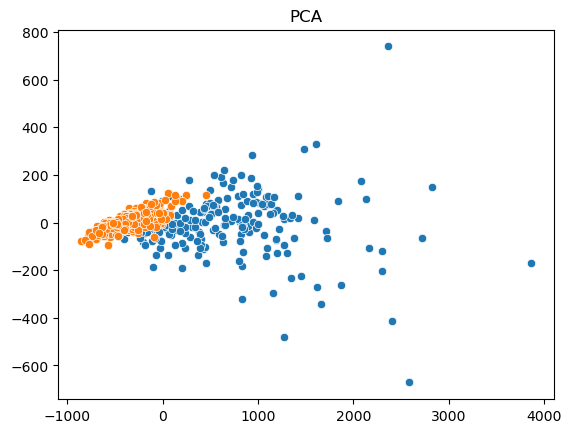

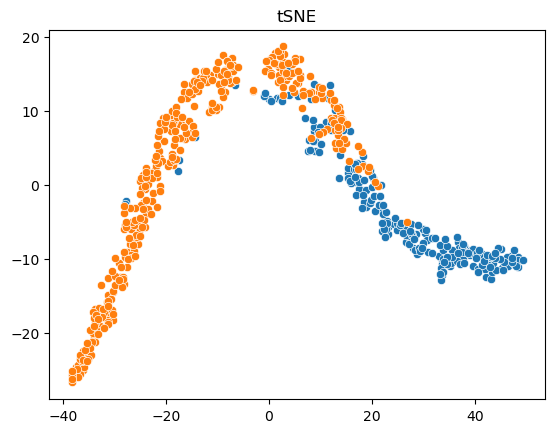

In [140]:
import matplotlib.pyplot as plt
# Try PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
x = pca.transform(X)

sns.scatterplot(x=x[y.values[:,0],0], y=x[y.values[:,0],1], markers='.')
sns.scatterplot(x=x[y.values[:,1],0], y=x[y.values[:,1],1], markers='.')
plt.title("PCA")

plt.figure()

# Try tSNE
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=30.0, random_state=0)
x = model.fit_transform(X)

sns.scatterplot(x=x[y.values[:,0],0], y=x[y.values[:,0],1], markers='.')
sns.scatterplot(x=x[y.values[:,1],0], y=x[y.values[:,1],1], markers='.')
plt.title("tSNE")

#### Exercise 5: Perform an Unsupervised Binary Classification of the Dataset

kNN, SVM, Random Forest...?

#### Exercise 6: Use a Toy Dataset to do Regression

As before, load the <b>Diabetes dataset</b> from ```scikit-learn```. This dataset is suitable for regression as it has continuous target (disease progression) and a decent number of patients and features for us to work with.

Use one of the ```sklearn``` <a href="https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html">Linear Regression</a> models to try and predict <b>disease progression</b> using the Diabetes dataset.

Consider some potential options:
<a href="https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge">
Ridge
</a>, 
<a href="https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.ElasticNet">
ElasticNet
</a>, 
<a href="https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Lasso">
Lasso
</a>

Which one did you try, and why?